<a href="https://colab.research.google.com/github/stefanusaw/Introduction_to_GenAI/blob/main/Project_DecisionTree_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[1 0]
 [0 1]]


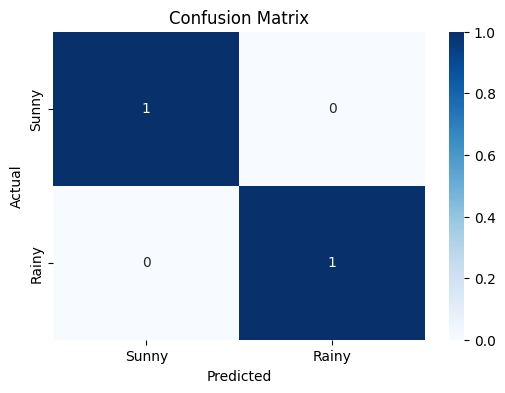

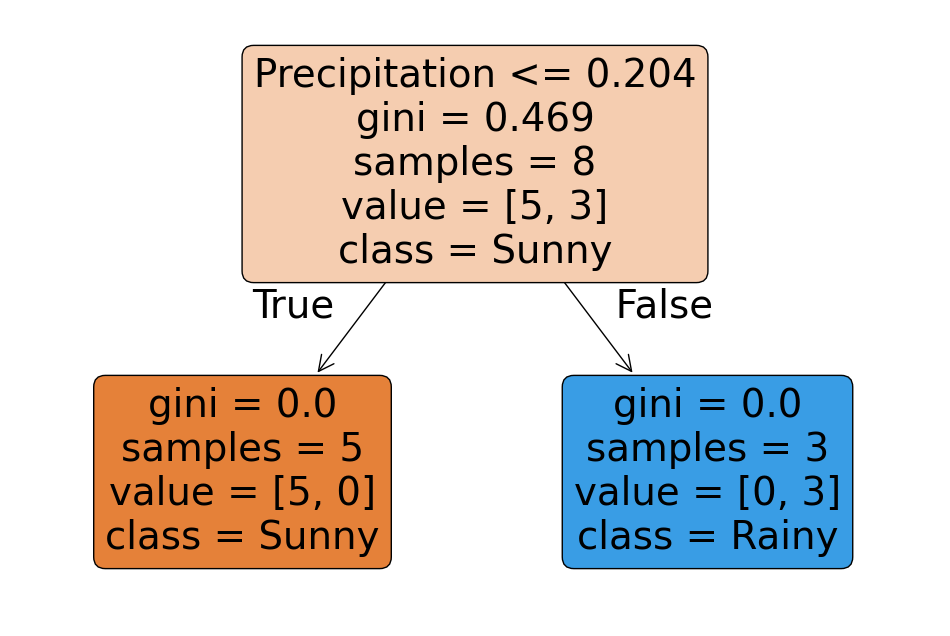

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a small custom dataset for weather prediction
data = {
    'Temperature': [30, 25, 20, 35, 40, 18, 22, 25, 30, 28],
    'Humidity': [60, 65, 70, 50, 45, 80, 75, 60, 55, 65],
    'WindSpeed': [5, 8, 7, 4, 3, 10, 6, 5, 4, 7],
    'Precipitation': [0, 1, 1, 0, 0, 1, 0, 0, 1, 0],  # 1 = Rain, 0 = No Rain
    'WeatherCondition': ['Sunny', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Sunny']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Step 2: Preprocess the data
# Handle missing values if any (not needed here, but for demonstration)
df = df.dropna()  # Drop missing data if there are any

# Convert categorical target variable (WeatherCondition) to numerical
df['WeatherCondition'] = df['WeatherCondition'].map({'Sunny': 0, 'Rainy': 1})

# Normalize numerical features (Temperature, Humidity, WindSpeed, Precipitation)
scaler = StandardScaler()
df[['Temperature', 'Humidity', 'WindSpeed', 'Precipitation']] = scaler.fit_transform(
    df[['Temperature', 'Humidity', 'WindSpeed', 'Precipitation']]
)

# Step 3: Split the data into training and testing sets (with stratify)
X = df[['Temperature', 'Humidity', 'WindSpeed', 'Precipitation']]  # Features
y = df['WeatherCondition']  # Target variable

# Split into 80% training and 20% testing data, ensuring balanced class distribution with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Accuracy: Percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, and F1-Score: Using classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix: To understand prediction errors
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Sunny', 'Rainy'], yticklabels=['Sunny', 'Rainy'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Visualizing the Decision Tree (optional)
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Sunny', 'Rainy'], rounded=True)
plt.show()


# Iris Clustering Project

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

print(df.head())
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [2]:
# Drop the species column for classification task
iris_df = df.drop(['class'], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_iris_df = scaler.fit_transform(iris_df)
print(pd.DataFrame(scaled_iris_df, columns=iris.feature_names).head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Trying MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the iris dataset
scaled_iris_df = scaler.fit_transform(iris_df)

# Display the first few rows of the scaled data
print(pd.DataFrame(scaled_iris_df, columns=iris.feature_names).head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


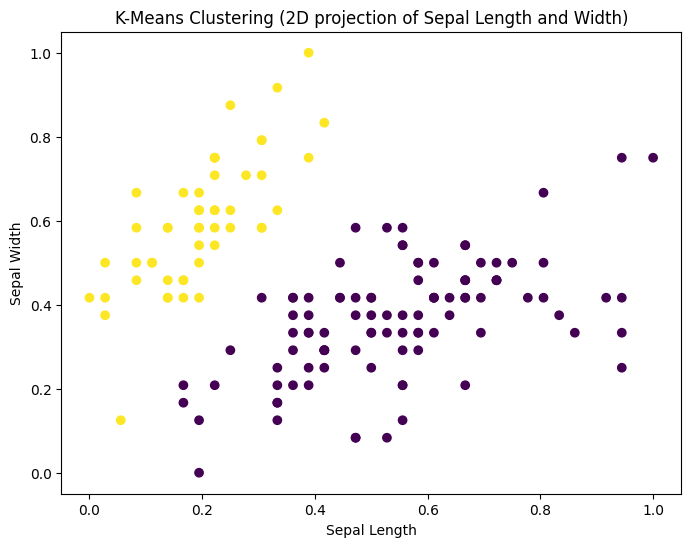

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_iris_df)

df['Kmeans_Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_iris_df[:, 0], scaled_iris_df[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering (2D projection of Sepal Length and Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

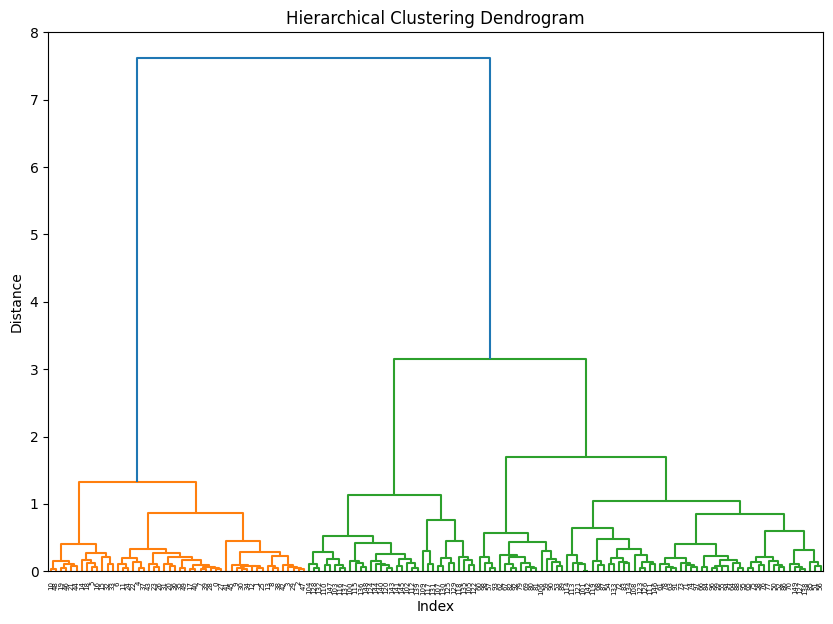

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform Hierarchical Clustering and plot dendrogram
linked = linkage(scaled_iris_df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [47]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_iris_df)

# KMeans Inertia
kmeans_inertia = kmeans.inertia_

# KMeans Silhouette Score
silhouette_avg_kmeans = silhouette_score(scaled_iris_df, kmeans.labels_)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering_labels = agg_clustering.fit_predict(scaled_iris_df)

# Agglomerative Clustering Silhouette Score
silhouette_avg_agg = silhouette_score(scaled_iris_df, agg_clustering_labels)

# Results
print(f"KMeans Inertia: {kmeans_inertia}")
print(f"KMeans Silhouette Score: {silhouette_avg_kmeans}")
print(f"Agglomerative Clustering Silhouette Score: {silhouette_avg_agg}")


KMeans Inertia: 12.12779075053819
KMeans Silhouette Score: 0.6300471284354711
Agglomerative Clustering Silhouette Score: 0.5047999262278894


# Evaluation

Increasing the n_cluster lowers the KMeans Silhouette Score suggesting a lower quality clustering. After trying various n_cluster values, n_cluster = 2 gives the best Silhouette Score value.

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, v_measure_score

# Perform KMeans clustering (assuming you've chosen K=3, for example)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_iris_df)

# True labels from the dataset
true_labels = iris.target

# Adjusted Rand Index (ARI) - measures the similarity between two data clusterings
ari = adjusted_rand_score(true_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Homogeneity Score - measures how much each cluster contains only members of a single class
homogeneity = homogeneity_score(true_labels, cluster_labels)
print(f"Homogeneity Score: {homogeneity:.4f}")

# V-Measure - evaluates the balance between homogeneity and completeness
v_measure = v_measure_score(true_labels, cluster_labels)
print(f"V-Measure Score: {v_measure:.4f}")


Adjusted Rand Index (ARI): 0.5681
Homogeneity Score: 0.5794
V-Measure Score: 0.7337


When evaluating against ARI, the StandardScaler() offers lower result. This triggers the attempt to use MinMaxScaler() and evidently, the result improves.